https://www.youtube.com/watch?v=ZDa-Z5JzLYM&list=PL-osiE80TeTsqhIuOqKhwlXsIBIdSeYtc&pp=iAQB

# classes and instances basics

attributes
methods
inheritance
instance of a class

In [2]:
class Employee:
    pass

emp_1 = Employee()
emp_2 = Employee()

print(emp_1)
print(emp_2)

# each have different locations in memory

In [3]:
# can set directly but better to do it during init method

emp_1.first_name = "Josh"
print(emp_1.first_name)

Josh


In [12]:
class Employee:
    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)

In [13]:
emp1 = Employee('Josh','Knight',50000)
print(emp1.email)

Josh.Knight@company.com


In [14]:
emp1.fullname()
# this essentially runs 
# Employee.fullname(emp1) -> thats what the self does

'Josh Knight'

In [15]:
emp1.__dict__ #returns all the attributes

{'first': 'Josh',
 'last': 'Knight',
 'pay': 50000,
 'email': 'Josh.Knight@company.com'}

# class variables
* different from variables in constructor

class variables - these are not variables defined in the __init__ constructor, this is a variable that is specific to the class only and not all the instances of the class

In [23]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

In [24]:
print(Employee.num_employees)
emp1 = Employee('Josh','Knight',50000)

# after 1 employee instantiated, count should increase
print(Employee.num_employees)

emp2 = Employee('Yuna','Fysh',70000)

# after 1 employee instantiated, count should increase
print(Employee.num_employees)

# current raise amounts
print(Employee.raise_amount)
print(emp1.raise_amount)
print(emp2.raise_amount)

emp1.raise_amount += 0.05

# adjusting the rate for 1 employee doesnt affect others
print(Employee.raise_amount)
print(emp1.raise_amount)
print(emp2.raise_amount)

# adjusting the rate for Employee affects others, but not the one that has alr changed raise amount
Employee.raise_amount+=0.01
print(Employee.raise_amount)
print(emp1.raise_amount)
print(emp2.raise_amount)

# take not the increment for Employee.num_employees will increment, to reset, will need to run the class again

0
1
2
1.04
1.04
1.04
1.04
1.09
1.04
1.05
1.09
1.05


# classmethods and staticmethods

add a decorator @classmethod
* this directly takes the class itself as an argument instead of the instance which is self

In [26]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

In [28]:
emp1 = Employee('Josh','Knight',50000)
emp2 = Employee('Yuna','Fysh',70000)

print(Employee.raise_amount)
print(emp1.raise_amount)
print(emp2.raise_amount)

emp1.set_raise_amt(1.07)
print(Employee.raise_amount)
print(emp1.raise_amount)
print(emp2.raise_amount)


1.04
1.04
1.04
1.07
1.07
1.07


another example

In [29]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

    @classmethod
    def split_name(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)

In [30]:
emp_str3 = 'John-Doe-80000'
emp3 = Employee.split_name(emp_str3)
print(emp3.email)

John.Doe@company.com


static methods do not pass anything not like self or cls but include them when theres some logical connection to the class but not really any dependency

In [37]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

    @classmethod
    def split_name(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)
    
    @staticmethod
    def is_workday(day):
        if day.weekday() == 6 or day.weekday==7:
            # .weekday means week of day
            return False
        return True
    # if the method doesnt use self or cls, then it should be a static method


In [38]:
import datetime
my_date=datetime.date(2024,10,20)
print(Employee.is_workday(my_date))

False


In [40]:
my_date.weekday()

6

# inheritance

create a subclass and then inherit all the attributes and methods from the parent class

In [42]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

    @classmethod
    def split_name(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)
    
    @staticmethod
    def is_workday(day):
        if day.weekday() == 6 or day.weekday==7:
            # .weekday means week of day
            return False
        return True
    # if the method doesnt use self or cls, then it should be a static method


In [63]:
class Developer(Employee):
    raise_amount = 1.10

dev1 = Developer('John','Doe',50000)
dev2 = Developer('Mary','Jane',70000)

print(dev1.email)
print(dev2.email)

print(dev1.pay)
dev1.apply_raise()
print(dev1.pay)


John.Doe@company.com
Mary.Jane@company.com
50000
55000


when you need to add attributes to a subclass

In [ ]:
class Developer(Employee):
    raise_amount = 1.10
    def __init__(self,first,last,pay,prog_lang):
        super().__init__(first,last,pay)
        # or can do 
        # Employee.__init__(self, first, last, pay) instead of super
        self.prog_lang = prog_lang

              
dev1 = Developer('John','Doe',50000,'Python')
dev2 = Developer('Mary','Jane',70000,'Java')

print(dev1.email)
print(dev1.prog_lang)
print(dev2.email)  
print(dev2.prog_lang)  

John.Doe@company.com
Python
Mary.Jane@company.com
Java


add manager class and show list of employees

In [76]:
class Manager(Employee):
    raise_amount = 1.70

    def __init__(self, first, last, pay, employees=None) -> None:
        super().__init__(first, last, pay)
        if employees is None:
            self.employees = []
        else:
            self.employees = employees

    def add_emp(self,emp):
        if emp not in self.employees:
            self.employees.append(emp)

    def remove_emp(self,emp):
        if emp not in self.employeed:
            self.employees.remove(emp)
    
    def print_emps(self):
        for emp in self.employees:
            print('-->',emp.fullname())

dev1 = Developer('John','Doe',50000,'Python')
dev2 = Developer('Mary','Jane',70000,'Java')
mgr1 = Manager('Sue','Smith',120000,[dev1])

print(mgr1.email)
print(mgr1.fullname)
print(mgr1.employees)
mgr1.print_emps()
mgr1.add_emp(dev2)
mgr1.print_emps()

Sue.Smith@company.com
<bound method Employee.fullname of <__main__.Manager object at 0x10f8f84f0>>
--> John Doe
--> John Doe
--> Mary Jane


isinstance issubclass

In [78]:
print(isinstance(mgr1,Manager))
print(isinstance(mgr1,Employee))
print(isinstance(mgr1,Developer))

True
True
False


In [80]:
print(issubclass(Manager,Manager))
print(issubclass(Developer,Employee))
print(issubclass(Manager,Developer))

True
True
False


# special methods (dunder __)

dunder init means __init__

* repr used for developer but str is for user
    * unambiguous representation used for debugging
* repr has more useful stuff returned

In [81]:
print(emp1)

In [82]:
repr(emp1)

'<__main__.Employee object at 0x105a3f190>'

In [83]:
str(emp1)

'<__main__.Employee object at 0x105a3f190>'

In [91]:
emp1 = Employee('John','Doe',50000)

print(emp1)

In [103]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

    @classmethod
    def split_name(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)
    
    @staticmethod
    def is_workday(day):
        if day.weekday() == 6 or day.weekday==7:
            # .weekday means week of day
            return False
        return True
    # if the method doesnt use self or cls, then it should be a static method

    def __repr__(self):
        return "Employee('{}', '{}', '{}')".format(self.first,self.last,self.pay)
    
    def __str__(self):
        return '{} - {}'.format(self.fullname(),self.email)

__repr__ is called by repr in python, same for __str__ and str

In [93]:
emp1 = Employee('John','Doe',50000)

print(emp1)

Employee('John', 'Doe', '50000')


In [104]:
emp1 = Employee('John','Doe',50000)

print(emp1) # by default the __str__ will be override called over __repr__ in print
print(str(emp1))

John Doe - John.Doe@company.com
John Doe - John.Doe@company.com


for int, the + is calls the __add__ method

In [105]:
# e.g.
1+2

3

In [106]:
int.__add__(1,2)

3

In [107]:
len('hello')

5

In [108]:
'hello'.__len__()

5

different methods
* https://docs.python.org/3/reference/datamodel.html

if u want smone to do len(emp1) and get the len of the full name, u can add that to do class. by default it wouldnt work since emp1 is an object

In [109]:
emp1

Employee('John', 'Doe', '50000')

In [110]:
len(emp1)

TypeError: object of type 'Employee' has no len()

In [111]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first+'.'+last+'@company.com'

        # this automatically adds 1 employee to the count when an instance of the class is created
        Employee.num_employees += 1
    
    # each method takes the instance as the first argument
    # the self refers to the instance that has been instanstiated
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    def apply_raise(self):
        self.pay = int(self.pay*self.raise_amount)

    @classmethod
    def set_raise_amt(cls,amount):
        cls.raise_amount = amount
    # this class methods will affect entire class 
    # cls is like self but for the class, cannot use class as argument sicne its used only for class definition in Python

    @classmethod
    def split_name(cls,emp_str):
        first,last,pay = emp_str.split('-')
        return cls(first,last,pay)
    
    @staticmethod
    def is_workday(day):
        if day.weekday() == 6 or day.weekday==7:
            # .weekday means week of day
            return False
        return True
    # if the method doesnt use self or cls, then it should be a static method

    def __repr__(self):
        return "Employee('{}', '{}', '{}')".format(self.first,self.last,self.pay)
    
    def __str__(self):
        return '{} - {}'.format(self.fullname(),self.email)
    
    def __len__(self):
        return len(self.fullname())
    
    def __test__(self):

In [113]:
emp1 = Employee('John','Doe',50000)

len(emp1)

8

In [114]:
emp1.__len__()

8

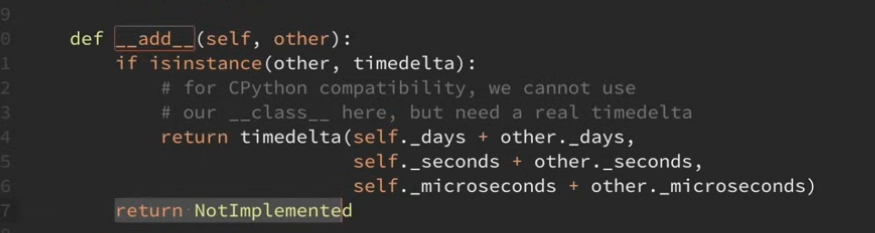

return NotImplemented doesnt throw any errors and allows other classes to handle the method if they contain the method

# property decorators

In [115]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first + '.' + last + '@company.com'

    def fullname(self):
        return '{} {}'.format(self.first,self.last)

In [116]:
emp1 = Employee('John','Doe',50000)
emp1.first='Jim'
print(emp1.first)
print(emp1.email)
# email doesnt get updated because its defined in the constructor

Jim
John.Doe@company.com


thus we use property decorators, getters, setters, deleters

In [126]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        # self.email = first + '.' + last + '@company.com'

    def email(self):
        return '{}.{}@company.com'.format(self.first,self.last)
    
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
emp1 = Employee('John','Doe',50000)
emp1.first='Jim'
print(emp1.first)
print(emp1.email())

Jim
Jim.Doe@company.com


but then u need to call the email() method, so instead u just add the @propery

In [128]:
# e.g. tracking number of Employees and standardised pay raise rate

class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        # self.email = first + '.' + last + '@company.com'

    @property
    def email(self):
        return '{}.{}@company.com'.format(self.first,self.last)
    
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
emp1 = Employee('John','Doe',50000)
emp1.first='Jim'
print(emp1.first)
print(emp1.email)

Jim
Jim.Doe@company.com


email now works like a attribute but then its actually defined in a class method

In [129]:
class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        # self.email = first + '.' + last + '@company.com'

    @property
    def email(self):
        return '{}.{}@company.com'.format(self.first,self.last)
    
    @property
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
emp1 = Employee('John','Doe',50000)
emp1.first='Jim'
print(emp1.first)
print(emp1.email)
print(emp1.fullname)

Jim
Jim.Doe@company.com
Jim Doe


In [130]:
emp1.fullname = 'Jim Doe'

AttributeError: can't set attribute

if we want to auto change the first and last name when we change the full name, we can use a setter

In [133]:
class Employee:

    num_employees = 0
    raise_amount = 1.04

    def __init__(self,first,last,pay) -> None:
        self.first = first
        self.last = last
        self.pay = pay
        # self.email = first + '.' + last + '@company.com'

    @property
    def email(self):
        return '{}.{}@company.com'.format(self.first,self.last)
    
    @property
    def fullname(self):
        return '{} {}'.format(self.first,self.last)
    
    @fullname.setter
    def fullname(self,name):
        first,last=name.split(' ')
        self.first = first
        self.last = last
    
    @fullname.deleter
    def fullname(self):
        print('Delete Name!')
        self.first=None
        self.last=None

emp1 = Employee('John','Doe',50000)
emp1.first='Jim'
print(emp1.first)
print(emp1.email)
print(emp1.fullname)
emp1.fullname = 'Jim Doe'
print(emp1.first)
print(emp1.last)
del emp1.fullname

Jim
Jim.Doe@company.com
Jim Doe
Jim
Doe
Delete Name!


# private variables and functions using __ in Python

Single Underscore (_)
* Purpose: A single leading underscore is a convention to indicate that the attribute or method is intended for internal use only. It's a hint to other developers that they shouldn't access or modify this attribute/method directly.
Behavior: Python doesn’t enforce this; you can still access or modify the attribute if you want.

Double Underscore (__)
* Purpose: A double leading underscore triggers name mangling in Python. This means Python will automatically modify the attribute's name to make it harder to accidentally override or access it from outside the class. It's used to prevent name conflicts in subclasses.
Behavior: The attribute is not easily accessible by its original name from outside the class, although you can still access it with the mangled name if you know what it is.

In [ ]:
class SampleClass:
    def __init__(self) -> None:
        self._a = 1
        self.__b = 1

s = SampleClass()
print(s._a)
print(s.__b) # __b is how you set private variables in Python

1


AttributeError: 'SampleClass' object has no attribute '__b'

In [ ]:
class SampleClass:
    def __init__(self) -> None:
        self.__a = 1
        self.__a +=9

    def get_a(self):
        return self.__a

s = SampleClass()
s.get_a()

10

can also do private functions in python

In [ ]:
class SampleClass:
    def __init__(self) -> None:
        self.__a = 1
        self.__a +=9

    def get_a(self):
        return self.__a
    
    def test1(self):
        return 20
    
    def _test2(self):
        return 30
    
    def __test3(self):
        return 40

s = SampleClass()
print(s.test1())
print(s._test2())
print(s.__test3()) # cannot be accessed outside the class

20
30


AttributeError: 'SampleClass' object has no attribute '__test3'

# static and class method

@ means decorator

used when a method is used but doesnt need the self, i.e. is not instance specific

instance methods: take in self (the normal class methods)
class methods: take in cls
static methods: dont take in self nor cls 

static methods can actually just be removed from the class and be define as a global function outside the class but for cases where its not general enough or specific for a class then you can just use the static method

The reason to use staticmethod is if you have something that could be written as a standalone function (not part of any class), but you want to keep it within the class because it's somehow semantically related to the clas

In [ ]:
# e.g. static method

class ChunkSimilarity(Metric):
    def __init__(self) -> None:
        super().__init__('Chunk Similarity')

    @staticmethod
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.strip()

        tokens = word_tokenize(text, preserve_line=True)
        stop_words = set(stopwords.words('english'))
        tokens = [i for i in tokens if not i in stop_words]

        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(i) for i in tokens]

        return tokens

preprocess_text can be defined outside but probably in this repo, there are other functions to preprocess_text and this one is a specific preprocess_text for this class

staticmethod is uncommon and usually unneccessary

adding the @staticmethod even thought the code works fine without to inform others about it

classmethod is common, usually used to create another instance with different set of arguments
* classmethod directly affects the class

e.g. class method below, if lets say smone inputs birth year instead of age, we can have a function that auto does it
* in this case the classmethod is used as an alternative constructor (this is one of the more common usage of classmethod - as an alternative constructor (i.e. __init__)
* or When you want to operate on the class itself, modifying or working with class-level attributes or logic.

In [149]:
from datetime import date
# e.g. class method
class Person:
    def __init__(self, name: str, age: int) -> None:
        self.name = name
        self.age = age

    def description(self) -> str:
        return "{} is {} years old.".format(self.name, self.age)
    
    @classmethod
    def age_from_year(cls, name: str, birth_year: int):
        current_year: int = date.today().year
        age: int = current_year - birth_year
        return cls(name, age)

    
p1 = Person('Jane', 29)
p1.description()

p2 = Person('Fede', 34)
p2.description()

'Fede is 34 years old.'

# useful tools

print help in python to see the details of how python looks for attribtues and methods in order of priority for subclasses and inheritance

In [ ]:
print(help(Developer))

Help on class Developer in module __main__:

class Developer(Employee)
 |  Developer(first, last, pay) -> None
 |  
 |  Method resolution order:
 |      Developer
 |      Employee
 |      builtins.object
 |  
 |  Methods inherited from Employee:
 |  
 |  __init__(self, first, last, pay) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply_raise(self)
 |  
 |  fullname(self)
 |      # each method takes the instance as the first argument
 |      # the self refers to the instance that has been instanstiated
 |  
 |  ----------------------------------------------------------------------
 |  Class methods inherited from Employee:
 |  
 |  set_raise_amt(amount) from builtins.type
 |  
 |  split_name(emp_str) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods inherited from Employee:
 |  
 |  is_workday(day)
 |  
 |  ----------------------------------------------------------------------

use __string__ to directly edit the print method for a class

In [45]:
class Fruit:
    def __init__(self,fruit,price):
        self.fruit = fruit
        self.price = price

f1 = Fruit('banana',2)
print(f1)

edit the __string__ method

In [47]:
class Fruit:
    def __init__(self,fruit,price):
        self.fruit = fruit
        self.price = price

    def __str__(self):
        return f'{self.fruit} @ ${self.price}'

f1 = Fruit('banana',2)
print(f1)

banana @ $2


or can use __repr__
* https://www.digitalocean.com/community/tutorials/python-str-repr-functions

use __add__ to directly edit the print method for a class

In [49]:
class Fruit:
    def __init__(self,fruit,price):
        self.fruit = fruit
        self.price = price

    def __str__(self):
        return f'{self.fruit} @ ${self.price}'
    

f1 = Fruit('banana',2)
f2 = Fruit('apple',1)

print(f1+f2)

TypeError: unsupported operand type(s) for +: 'Fruit' and 'Fruit'

edit the __add__ method

In [59]:
class Fruit:
    def __init__(self,fruit,price):
        self.fruit = fruit
        self.price = price

    def __str__(self):
        return f'{self.fruit} @ ${self.price}'

    def __add__(self,other):
        return self.price+other.price

f1 = Fruit('banana',2)
f2 = Fruit('apple',1)

print(f1+f2)

3


In [61]:
class Fruit:
    def __init__(self,fruit,price):
        self.fruit = fruit
        self.price = price

    def __str__(self):
        return f'{self.fruit} @ ${self.price}'

    # for variable number of others
    def __add__(self,*others):
        res = self.price
        for other in others:
            res += other.price
        return res
    
f1 = Fruit('banana',2)
f2 = Fruit('apple',1)
f3 = Fruit('watermelon',5)

print(f1+f2+f3)
    

TypeError: unsupported operand type(s) for +: 'int' and 'Fruit'

this doesnt work because f1+f2 returns an int and then that int gets calculated with a Fruit object which thus does not work